In [ ]:
!pip install pydot graphviz
!pip install yfinance
!pip install pandas_datareader
!pip install plot_model

In [ ]:
!pip install pydot
!pip install graphviz


In [ ]:
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import plot_model

In [ ]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


In [ ]:
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL , GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-10-09,182.820007,185.850006,182.050003,185.169998,185.169998,26343100,AMAZON
2024-10-10,187.130005,188.130005,185.830002,186.649994,186.649994,27785000,AMAZON
2024-10-11,186.630005,189.929993,186.300003,188.820007,188.820007,25751600,AMAZON
2024-10-14,189.779999,189.830002,187.360001,187.539993,187.539993,22614400,AMAZON
2024-10-15,187.630005,188.410004,184.580002,187.690002,187.690002,32178900,AMAZON
2024-10-16,187.050003,187.779999,185.610001,186.889999,186.889999,23456800,AMAZON
2024-10-17,188.220001,188.940002,186.000000,187.529999,187.529999,25039400,AMAZON
2024-10-18,187.149994,190.740005,186.279999,188.990005,188.990005,37417700,AMAZON
2024-10-21,188.050003,189.460007,186.399994,189.070007,189.070007,24639400,AMAZON


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,197.408690,199.190238,195.725913,197.585040,197.191326,5.859305e+07
std,21.177010,21.388670,20.782258,21.150578,21.344916,3.013966e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,182.064999,183.084999,180.389999,182.209999,181.424538,4.335070e+07
50%,191.425003,192.650002,190.044998,191.504997,190.920509,5.226145e+07
75%,219.159996,221.607502,217.047504,220.150002,220.039001,6.502268e+07
max,236.479996,237.490005,234.449997,236.479996,236.479996,3.186799e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-10-23 to 2024-10-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


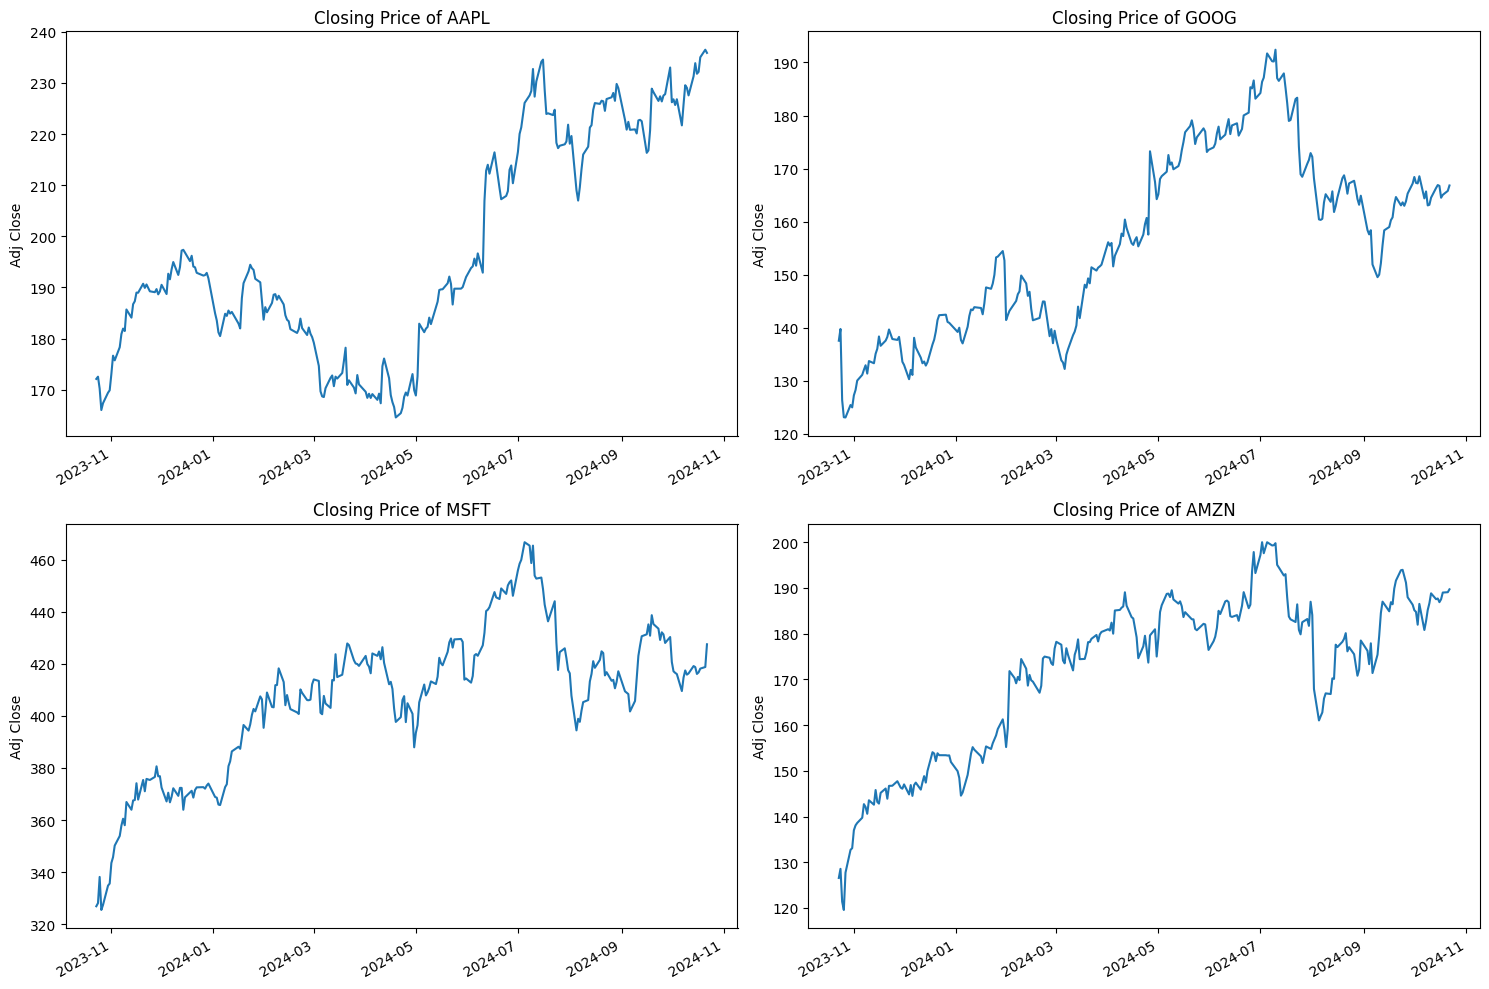

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()


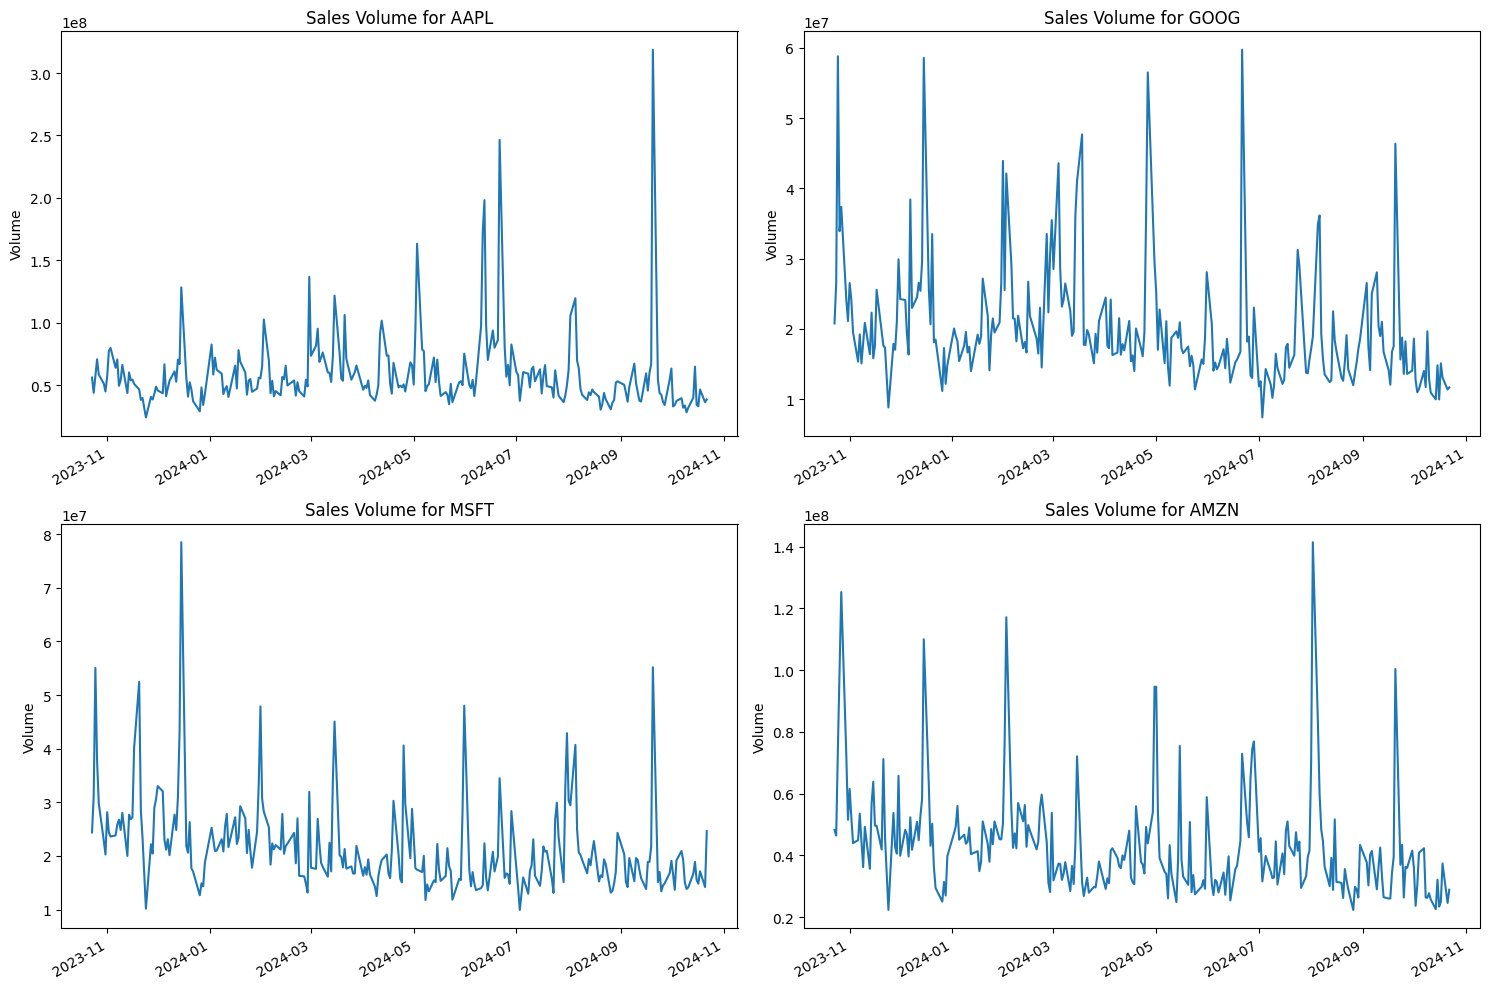

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

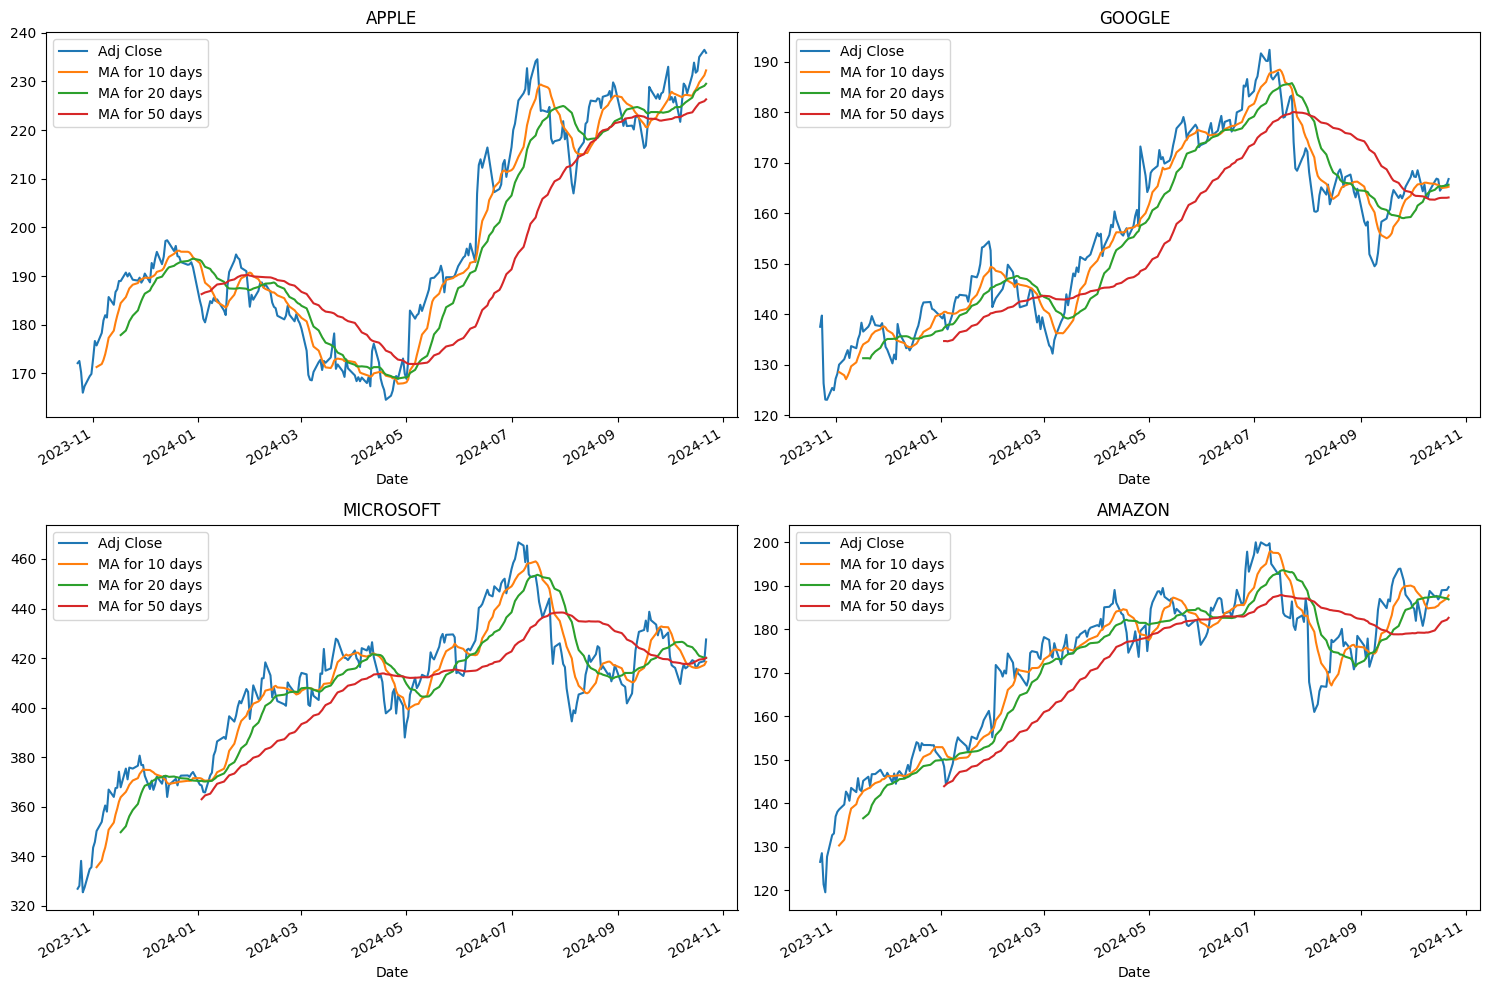

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

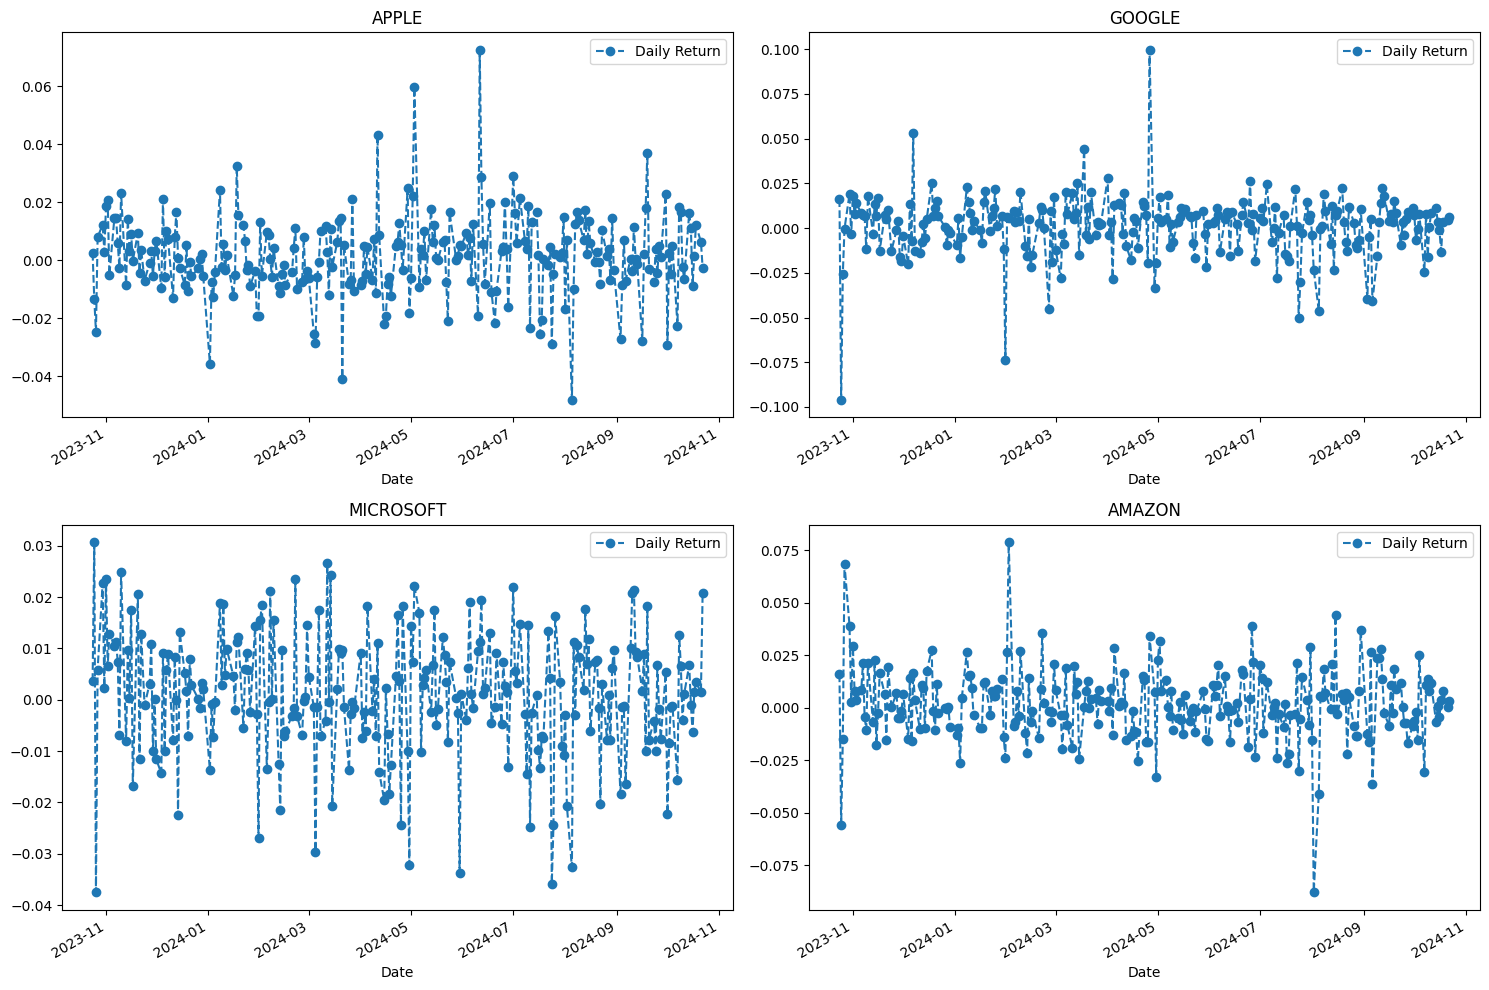

In [ ]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

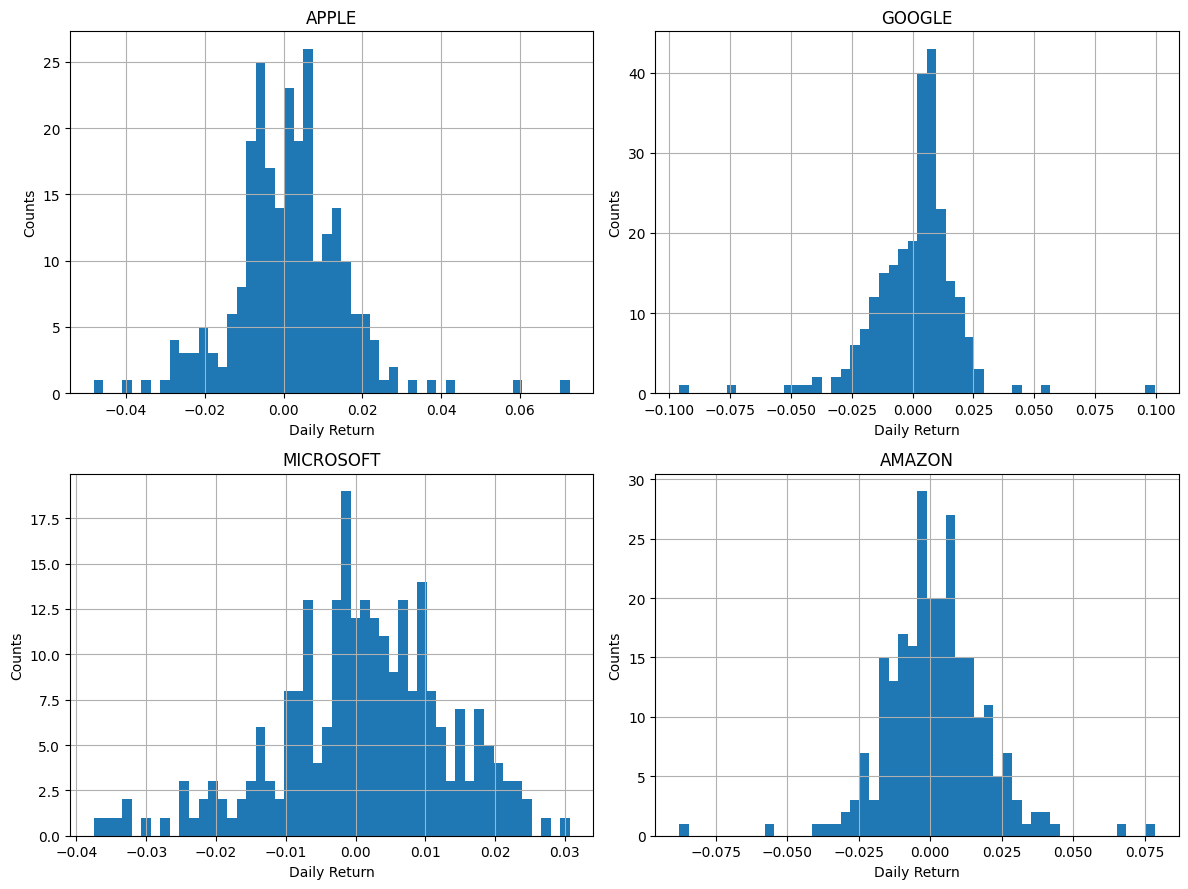

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
import yfinance as yf

# Define the stock symbols and date range
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Fetch the data using yfinance directly
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
print(tech_rets.head())



[*********************100%***********************]  4 of 4 completed

Ticker                         AAPL      AMZN      GOOG      MSFT
Date                                                             
2023-10-23 00:00:00+00:00       NaN       NaN       NaN       NaN
2023-10-24 00:00:00+00:00  0.002543  0.015803  0.016099  0.003674
2023-10-25 00:00:00+00:00 -0.013492 -0.055772 -0.095989  0.030678
2023-10-26 00:00:00+00:00 -0.024606 -0.014993 -0.025499 -0.037514
2023-10-27 00:00:00+00:00  0.007969  0.068328 -0.000324  0.005856


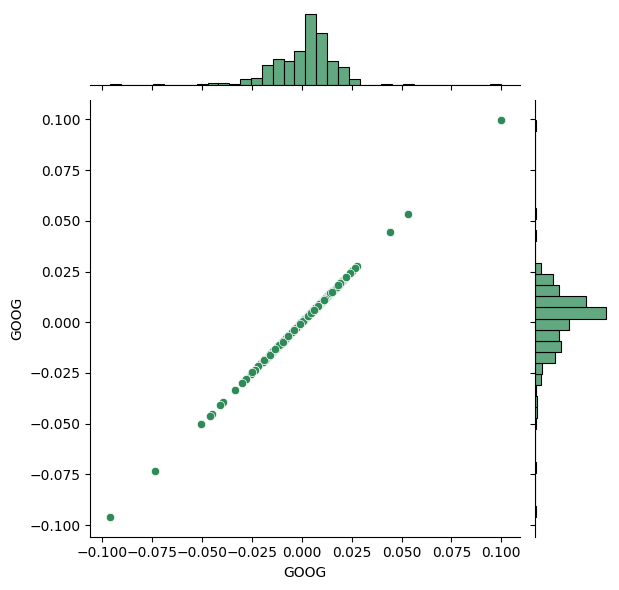

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

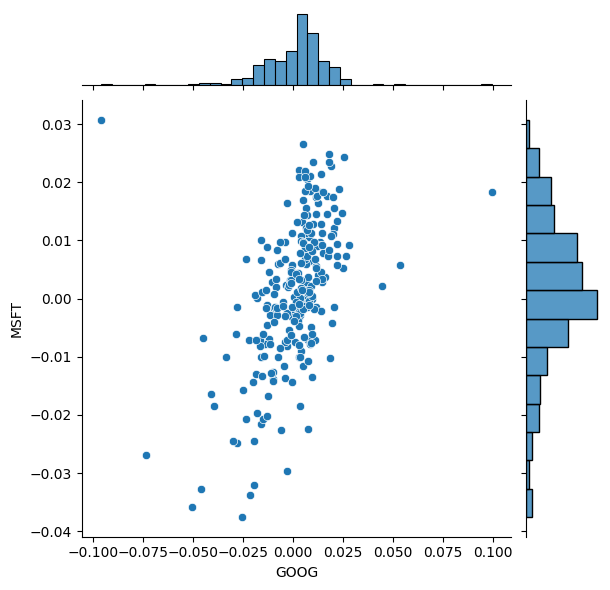

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

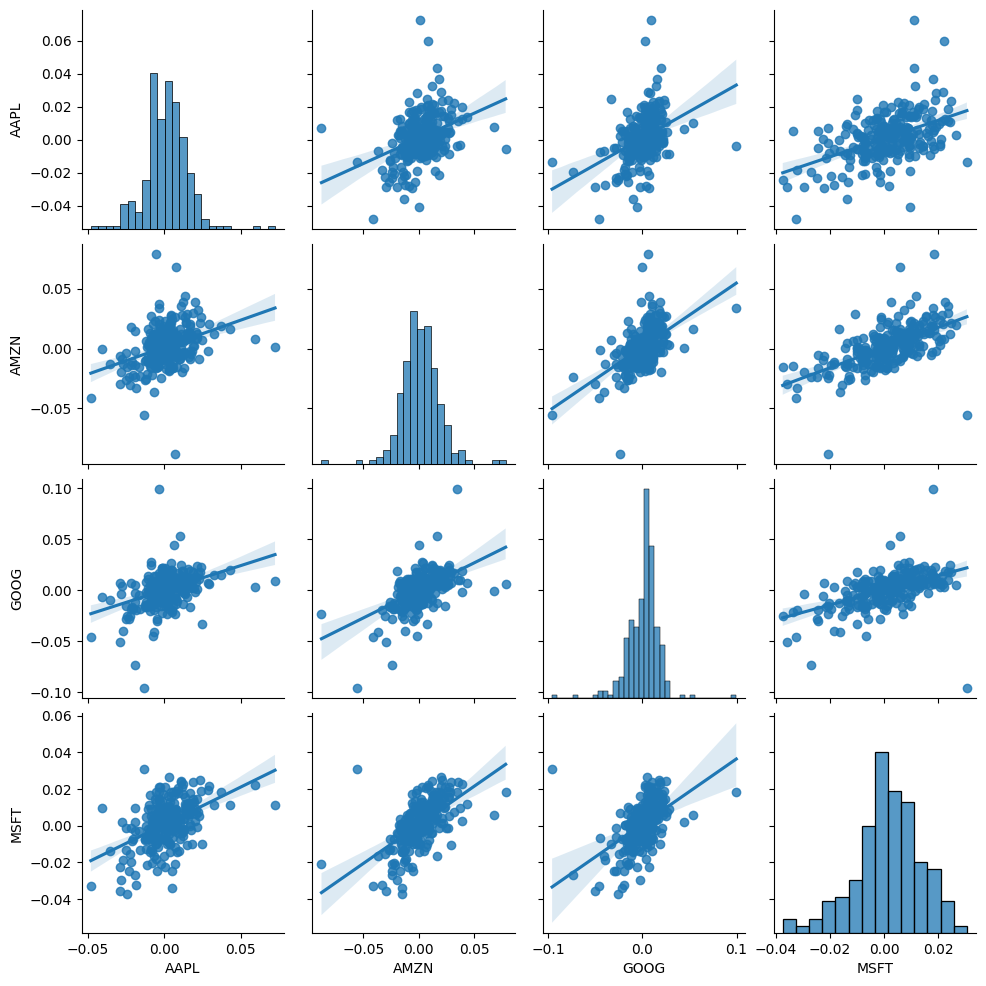

In [ ]:
sns.pairplot(tech_rets, kind='reg')

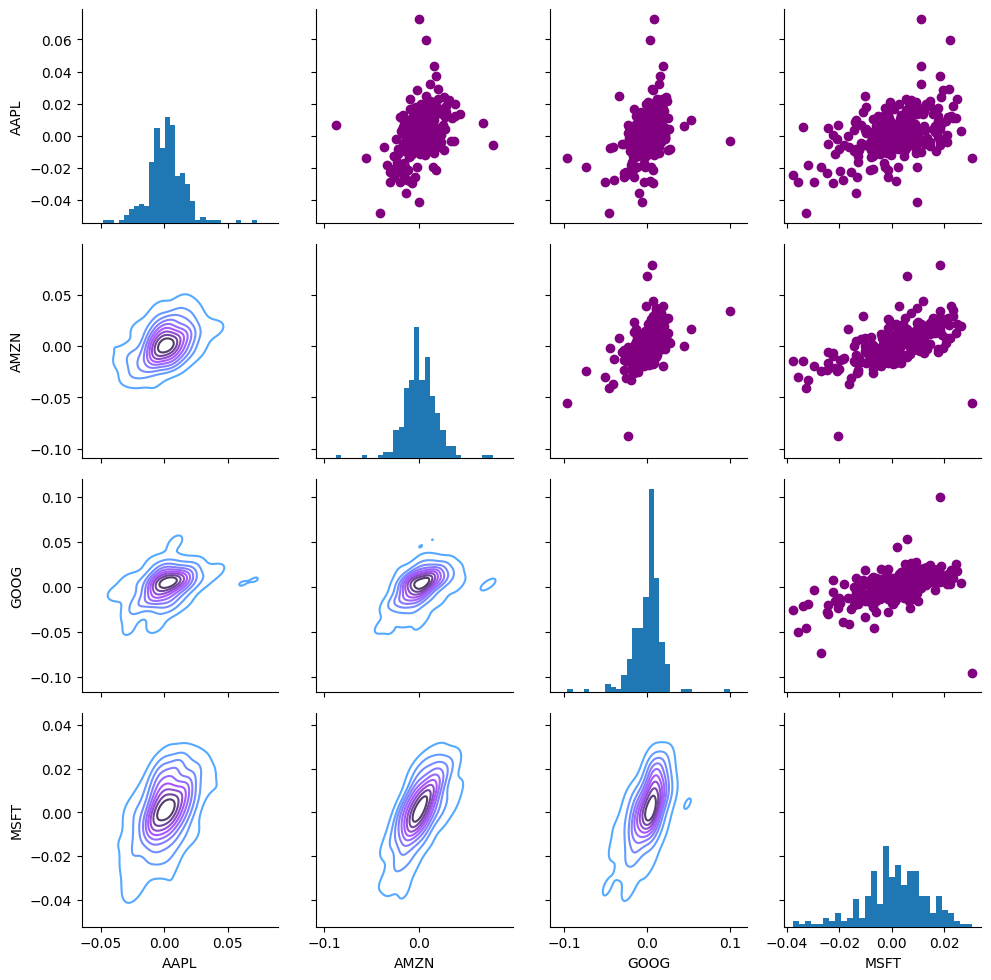

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

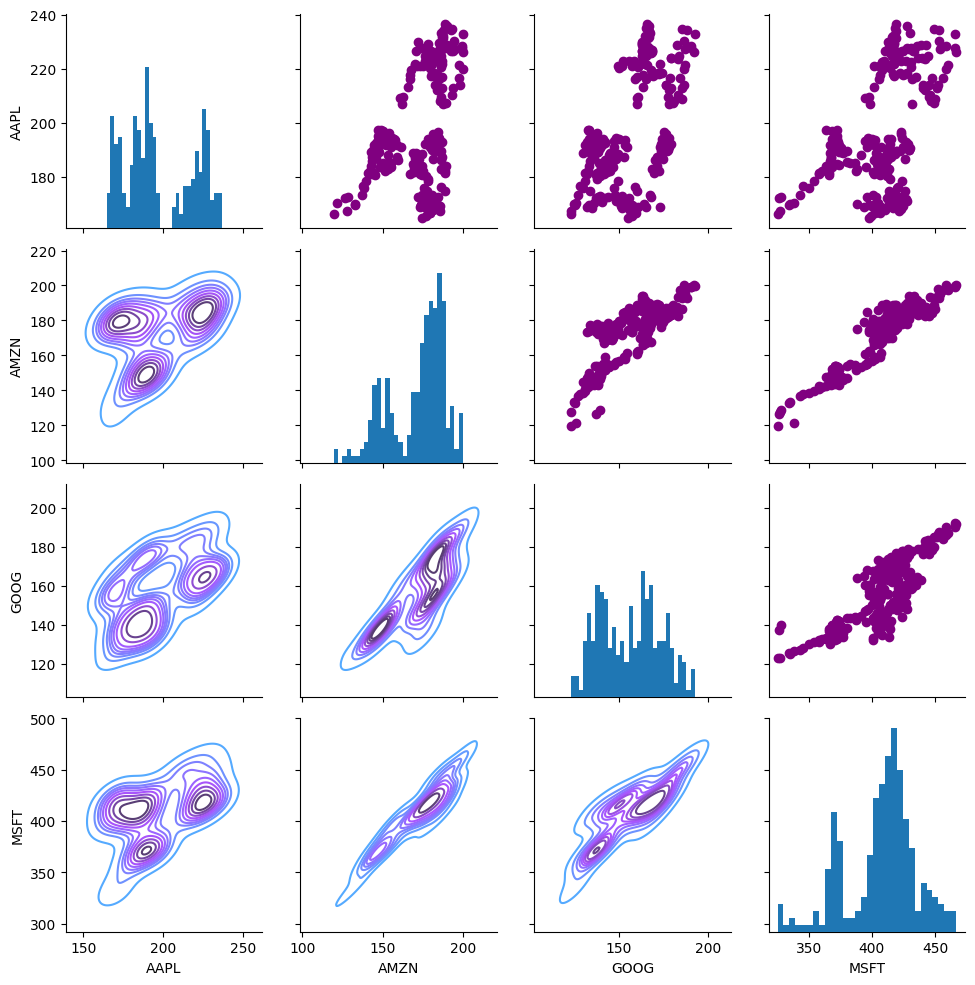

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

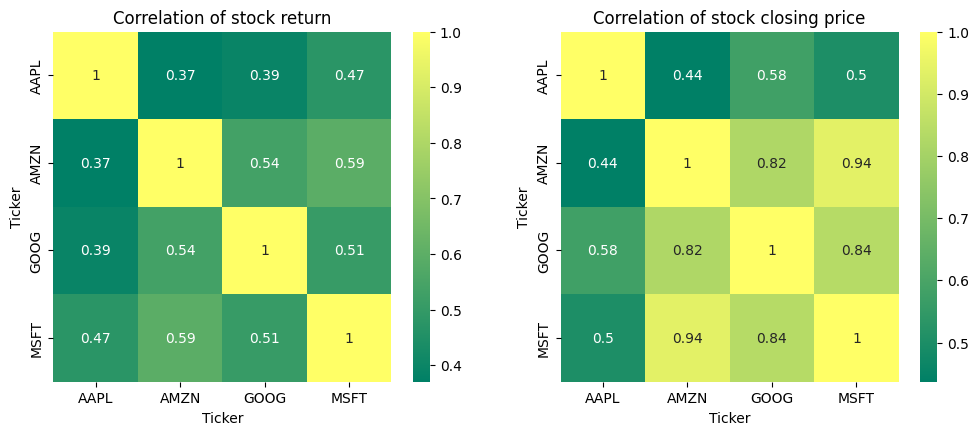

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

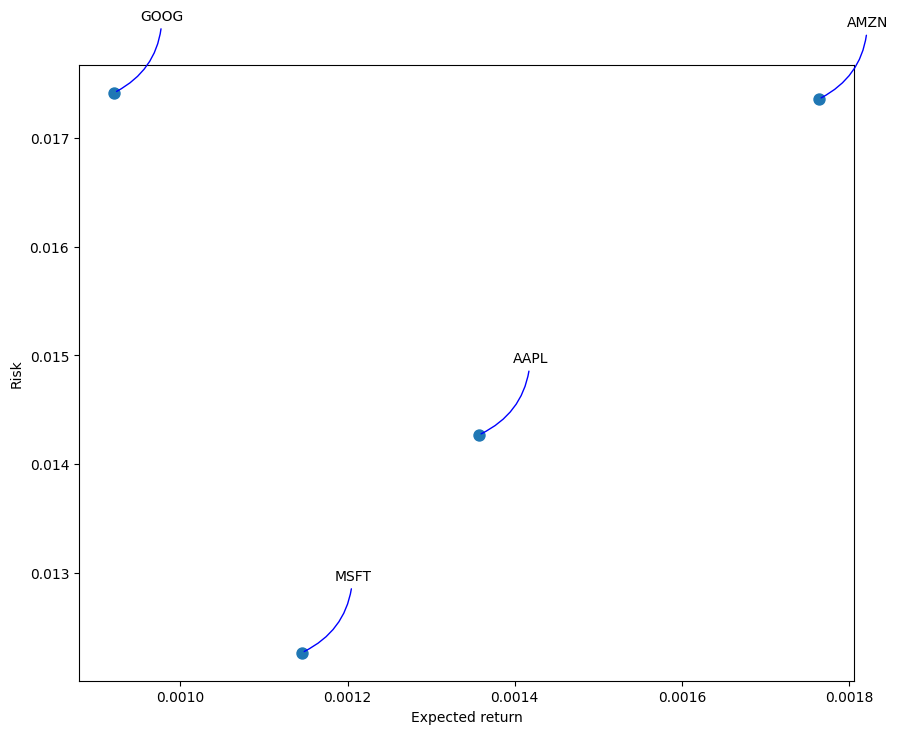

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
df = yf.download('AAPL', start='2018-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568924,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561874,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750278,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214222,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061153,82271200
...,...,...,...,...,...,...
2024-10-16,231.600006,232.119995,229.839996,231.779999,231.779999,34082200
2024-10-17,233.429993,233.850006,230.520004,232.149994,232.149994,32993800
2024-10-18,236.179993,236.179993,234.009995,235.000000,235.000000,46431500


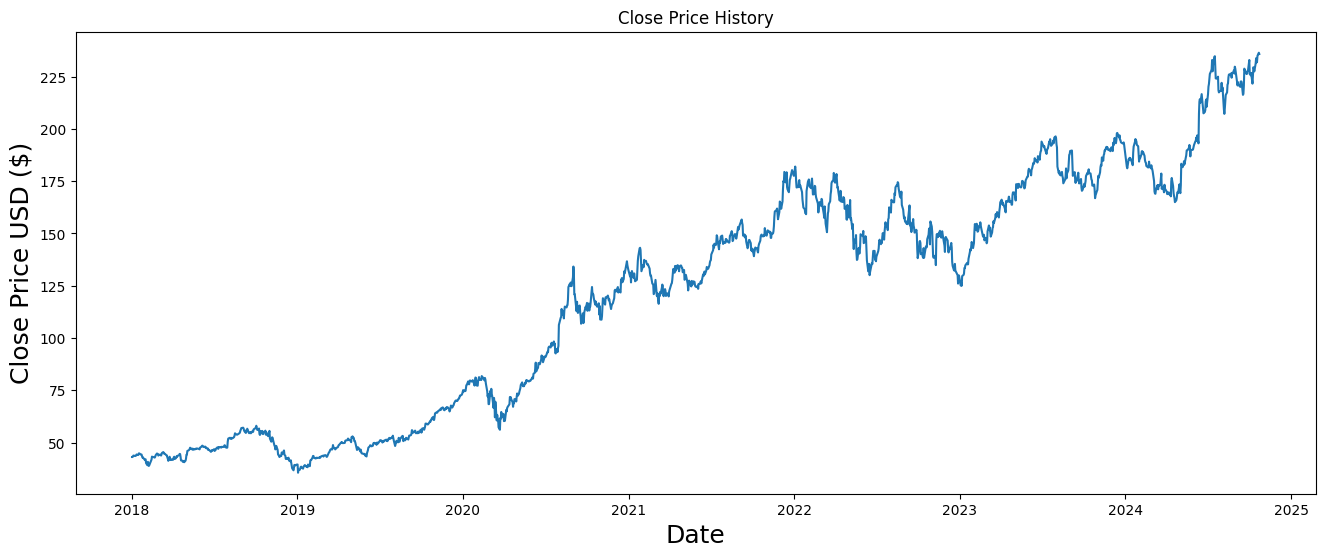

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1628

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03741305],
       [0.03737573],
       [0.03837109],
       ...,
       [0.99263436],
       [1.        ],
       [0.99691441]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.03741305, 0.03737573, 0.03837109, 0.04082216, 0.04001344,
       0.03998855, 0.03993877, 0.04117054, 0.04342254, 0.04230276,
       0.04592339, 0.04612245, 0.0451271 , 0.04331056, 0.04336032,
       0.03985169, 0.03598223, 0.0364799 , 0.03206301, 0.03083125,
       0.03140357, 0.03183905, 0.02278128, 0.01779205, 0.0259291 ,
       0.02158684, 0.01612481, 0.01769251, 0.02553097, 0.027559  ,
       0.03132892, 0.03832133, 0.03762456, 0.03690295, 0.03593247,
       0.03771167, 0.04144426, 0.04576164, 0.04504   , 0.04470406,
       0.04082216, 0.04232765, 0.04308662, 0.04289997, 0.04085949,
       0.04323591, 0.04701827, 0.04918318, 0.04700583, 0.04510221,
       0.04536348, 0.04457965, 0.04119543, 0.04112078, 0.03618131,
       0.03317035, 0.02830553, 0.03804761, 0.0325358 , 0.03022158])]
[0.03183904664470283]

[array([0.03741305, 0.03737573, 0.03837109, 0.04082216, 0.04001344,
       0.03998855, 0.03993877, 0.04117054, 0.04342254, 0.04230276,
       0.04592339, 0.04612245, 0.04

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.0057
Epoch 2/10
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 7.6850e-04
Epoch 3/10
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 4.7494e-04
Epoch 4/10
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 4.3579e-04
Epoch 5/10
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 3.5720e-04
Epoch 6/10
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 3.0069e-04
Epoch 7/10
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 3.2354e-04
Epoch 8/10
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 3.6077e-04
Epoch 9/10
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 2.8056e-04
Epoch 10/10
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 3.1993e-04


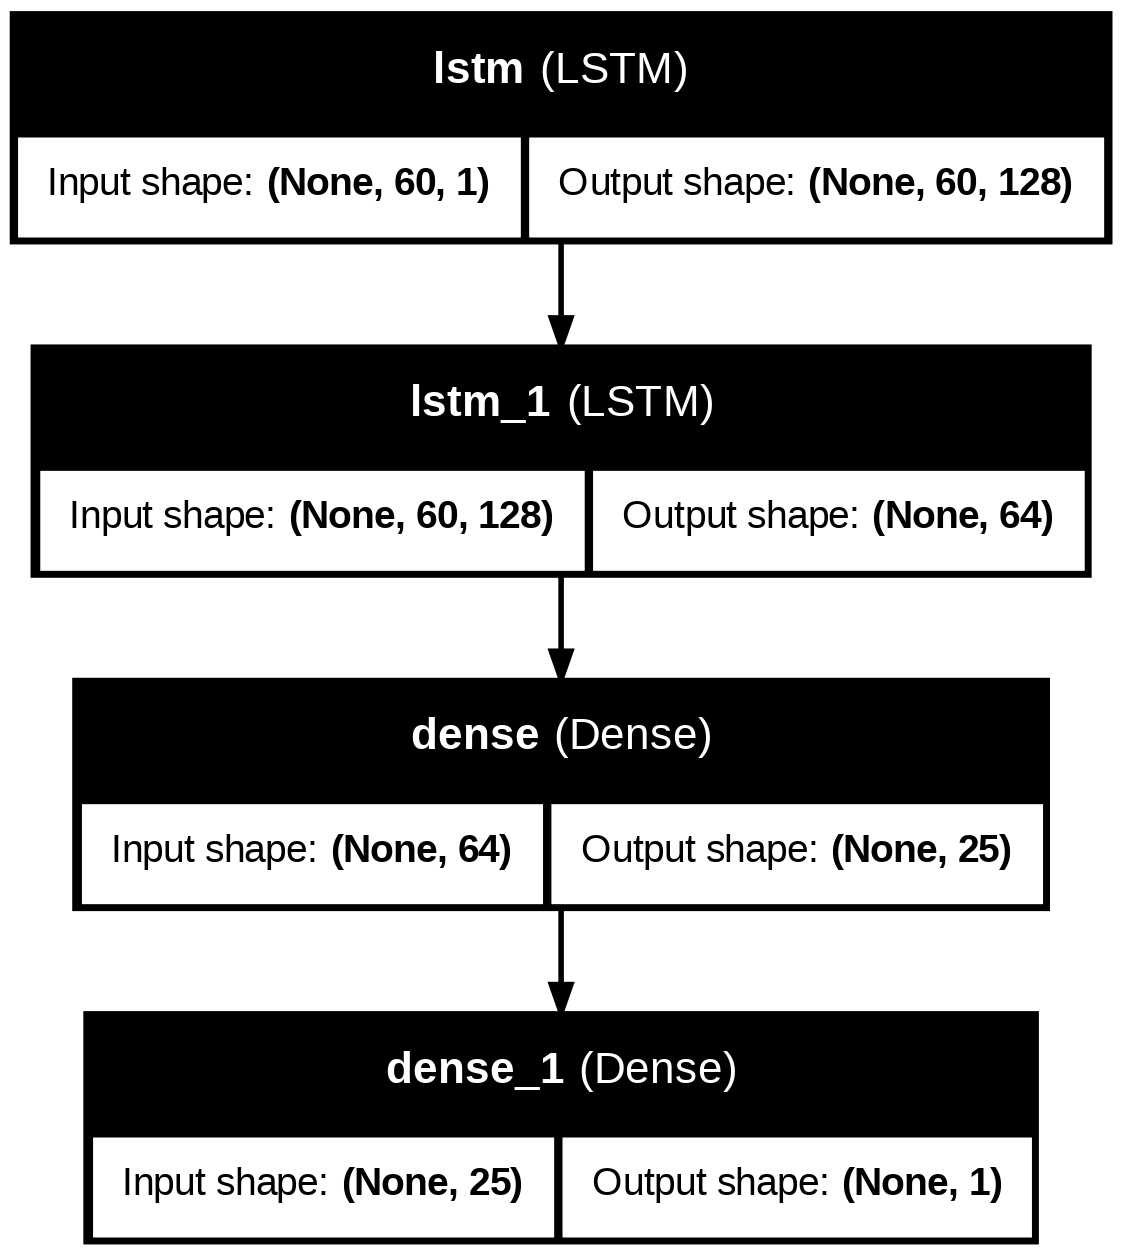

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Get the last 60 days from the dataset (for Apple stock)
last_60_days = df['Close'][-60:].values
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1, 1))

# Prepare the input for the model to predict the next day
X_test_forecast = []
X_test_forecast.append(last_60_days_scaled)

X_test_forecast = np.array(X_test_forecast)
X_test_forecast = np.reshape(X_test_forecast, (X_test_forecast.shape[0], X_test_forecast.shape[1], 1))


In [ ]:
# Initialize X_test_forecast with the last 60 days of data from the test set
X_test_forecast = x_test[-1]  # Start with the last input from the test data
X_test_forecast = np.reshape(X_test_forecast, (1, X_test_forecast.shape[0], 1))  # Shape (1, 60, 1)

# Create an empty list to store the forecasted prices
forecasted_prices = []

# Forecast the next 30 days
days_to_predict = 30  # Change to 10 if you want to predict 10 days
for day in range(days_to_predict):
    predicted_price = model.predict(X_test_forecast)  # Predict the next price
    forecasted_prices.append(predicted_price[0][0])  # Store the predicted price

    # Append the predicted price to the sequence, and remove the oldest price
    new_input = np.append(X_test_forecast[0][1:], predicted_price)  # Update sequence
    X_test_forecast = np.reshape(new_input, (1, new_input.shape[0], 1))  # Reshape to (1, 60, 1)

# Print forecasted prices for the next 30 days
print(forecasted_prices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

In [ ]:
# Inverse transform the forecasted prices to get them back to the original scale
forecasted_prices = np.array(forecasted_prices).reshape(-1, 1)
forecasted_prices = scaler.inverse_transform(forecasted_prices)

# Convert to a flat list for easy viewing
forecasted_prices = forecasted_prices.flatten()

print(f"Forecasted prices for the next {days_to_predict} days:")
print(forecasted_prices)


Forecasted prices for the next 30 days:
[240.37202 244.19095 247.78589 251.15544 254.2851  257.1667  259.8025
 262.20258 264.38153 266.3561  268.1436  269.76074 271.2234  272.54605
 273.742   274.82318 275.80035 276.68332 277.4808  278.20074 278.8504
 279.43628 279.96442 280.44016 280.86853 281.25403 281.60077 281.91257
 282.1928  282.44455]


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


5.091448961297071

<ipython-input-37-26846c01b6a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


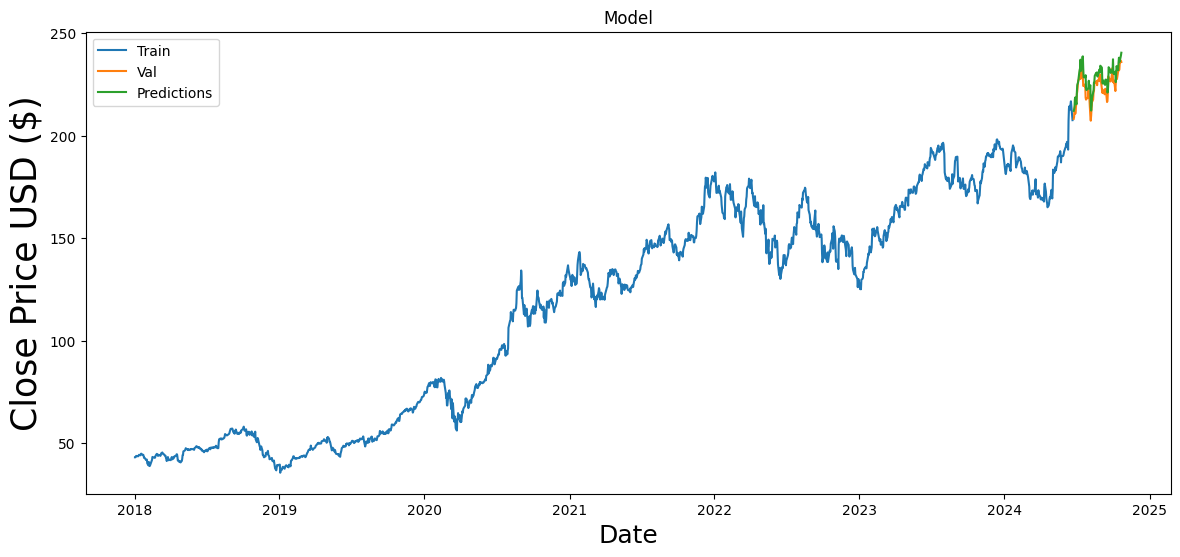

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=25)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2024-06-24,208.139999,211.998642
2024-06-25,209.070007,212.652496
2024-06-26,213.250000,213.599640
2024-06-27,214.100006,217.759827
2024-06-28,210.619995,218.596786
...,...,...
2024-10-16,231.779999,237.925827
2024-10-17,232.149994,235.787567
2024-10-18,235.000000,236.249649
